## Task 2

## Exploratory Data Analysis on Dataset - Terrorism

# Problem Statement

#### - Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

#### - As a security/defense analyst, try to find out the hot zone of terrorism.

#### - What all security issues and insights you can derive by EDA?

# Dataset Information

Information on more than 180,000 Terrorist Attacks<br>

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
data = pd.read_csv("D:\\M. Tech in Data Science & Machine Learning\\Internship\\LetsGrowMore\\Task2\\globalterrorismdb_0718dist.csv",encoding='latin1')#reading the dataset

In [3]:
data.head()#first 5 observations

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.tail()#last 5 observations

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
data.shape#shape of the data

(181691, 135)

In [6]:
data.columns.values#column names

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
#Renaming some columns
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [8]:
#only extracting those columns which will help in Exploratory data analysis
data = data[['eventid','Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive','success']]

In [9]:
data.head()

,eventid,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive,success
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


In [10]:
data.shape  # displaying the number of rows and columns in the dataset after extraction

(181691, 20)

In [11]:
data.isnull().sum()#finding null values

eventid            0
Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
success            0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   eventid     181691 non-null  int64  
 1   Year        181691 non-null  int64  
 2   Month       181691 non-null  int64  
 3   day         181691 non-null  int64  
 4   Country     181691 non-null  object 
 5   State       181270 non-null  object 
 6   Region      181691 non-null  object 
 7   City        181257 non-null  object 
 8   latitude    177135 non-null  float64
 9   longitude   177134 non-null  float64
 10  Attacktype  181691 non-null  object 
 11  kill        171378 non-null  float64
 12  Wound       165380 non-null  float64
 13  target1     181055 non-null  object 
 14  summary     115562 non-null  object 
 15  Group       181691 non-null  object 
 16  Targettype  181691 non-null  object 
 17  Weapon      181691 non-null  object 
 18  motive      50561 non-null   object 
 19  su

In [13]:
# drop remaining nan values by rows and assign to new dataframe
data1 = data.dropna()

## Exploratory Data Analysis and visualization

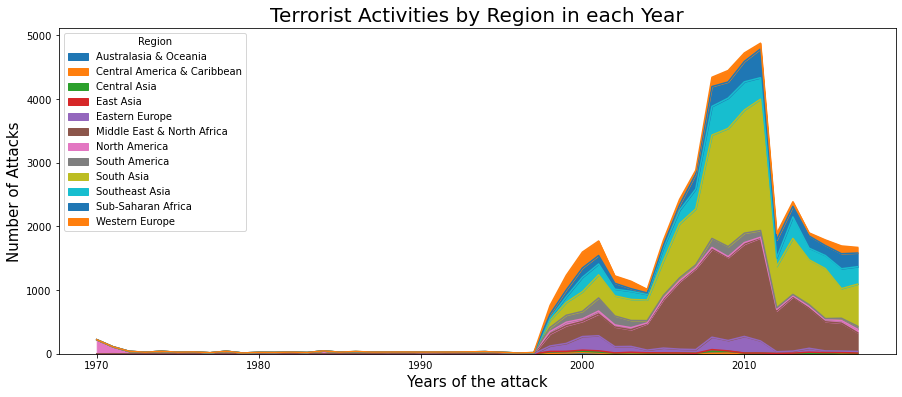

In [16]:
pd.crosstab(data1['Year'], data1['Region']).plot(kind='area',figsize=(15,6))
plt.xlabel('Years of the attack',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.title('Terrorist Activities by Region in each Year',fontsize=20)
plt.show()

In [17]:
data1['Country'].value_counts()[:10]#countries with most number of attacks

Iraq             8811
India            5427
Pakistan         4900
Afghanistan      3206
Philippines      2253
Thailand         1782
Russia           1488
United States    1426
Colombia         1389
Algeria          1328
Name: Country, dtype: int64

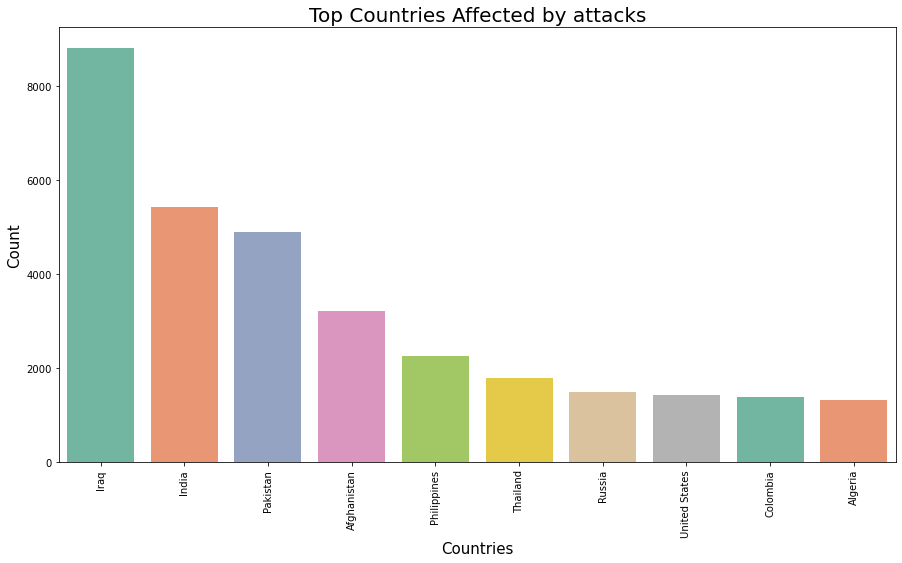

In [18]:
sns.barplot(data1['Country'].value_counts()[:10].index,data1['Country'].value_counts()[:10].values,palette='Set2')
plt.title('Top Countries Affected by attacks',fontsize=20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

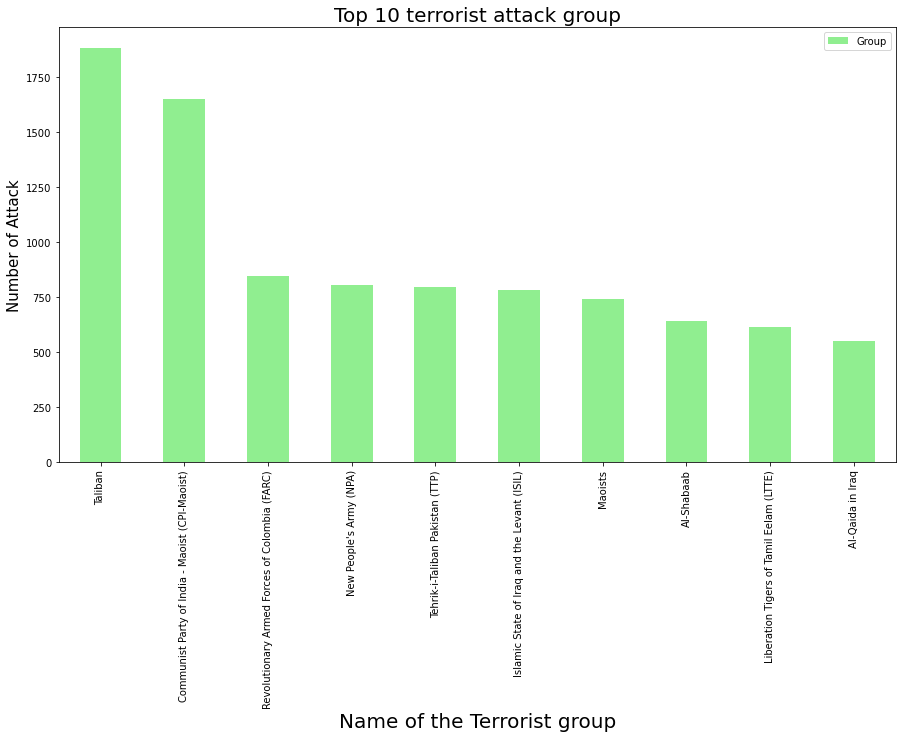

In [19]:
data1['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='lightgreen')
plt.title("Top 10 terrorist attack group",fontsize=20)
plt.xticks(rotation = 90)
plt.xlabel("Name of the Terrorist group",fontsize=20)
plt.ylabel("Number of Attack",fontsize=15)
plt.show()

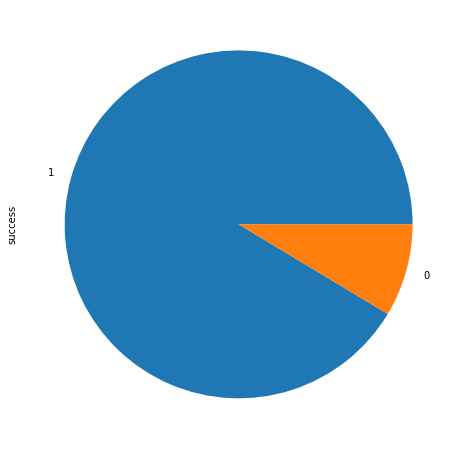

In [20]:
data1['success'].value_counts().plot(kind='pie')
plt.show()

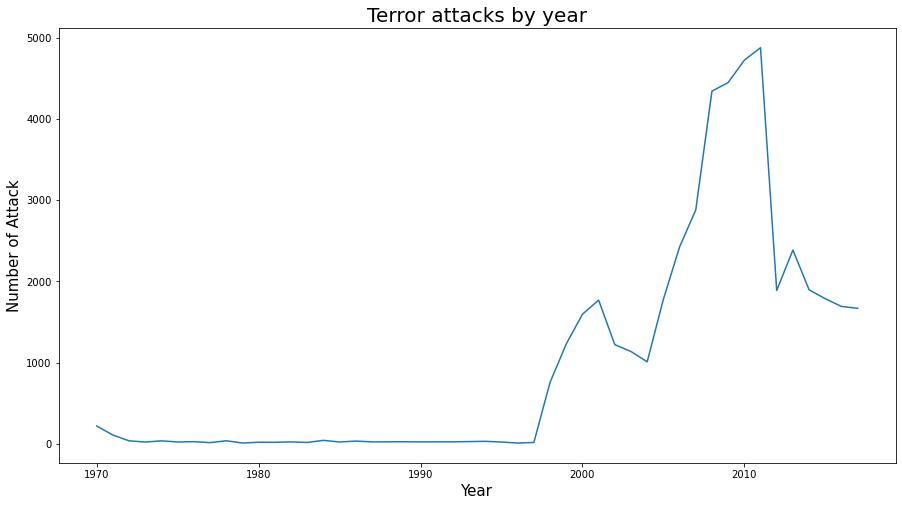

In [22]:
# plot terror attacks by year
year = data1['eventid'].groupby(data1['Year']).count()
ax = sns.lineplot(data=year)
plt.title("Terror attacks by year",fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Number of Attack",fontsize=15)
plt.show()

In [23]:
#Top Total number of kills by the Group in the following country

In [24]:
df1=data1[['Group','Country','kill']]
df1=df1.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(15)
df1

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,6825.0
1,Taliban,Afghanistan,5976.0
2,Tehrik-i-Taliban Pakistan (TTP),Pakistan,4198.0
3,Al-Qaida in Iraq,Iraq,3754.0
4,Al-Qaida,United States,3001.0
5,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,2569.0
6,Boko Haram,Nigeria,2090.0
7,Al-Shabaab,Somalia,2082.0
8,Communist Party of India - Maoist (CPI-Maoist),India,2060.0
9,Islamic State of Iraq (ISI),Iraq,1669.0


# Conclusion

In [25]:
print("Country with the most number of attacks:",data1['Country'].value_counts().idxmax())
print()
print("City with the most number of attacks:",data1['City'].value_counts().idxmax())
print()
print("Region with the most number of attacks:",data1['Region'].value_counts().idxmax())
print()
print("Year with the most number of attacks:",data1['Year'].value_counts().idxmax())
print()
print("Month with the most number of attacks:",data1['Month'].value_counts().idxmax())
print()
print("Group with the most number of attacks:",data1['Group'].value_counts().index[1])#as first entry is 'unknown'
print()
print("Most Attack Types:",data1['Attacktype'].value_counts().idxmax())

Country with the most number of attacks: Iraq

City with the most number of attacks: Baghdad

Region with the most number of attacks: South Asia

Year with the most number of attacks: 2011

Month with the most number of attacks: 7

Group with the most number of attacks: Taliban

Most Attack Types: Bombing/Explosion


In [26]:
#The above Conclusions are derived from the above analysis